# Birth Tracker 예제
### (데이터 전처리 실습예제)

- 본 예제는 학습을 위한 데이터 전처리 예제이며, 이를 이용한 행위에 대한 책임은 사용자 본인에게 있습니다.
- 무단 변경, 재활용은 거절합니다.
- 작성자 : 반치용 ( bcy88@naver.com / 010-9100-3935)

> T0 기본형태

> 파일 로딩

In [1]:
import os
import re

In [2]:
workDIr = os.path.abspath('.')
file_list = []
for dirpath, _, filenames in os.walk(workDIr):
    for filename in filenames:
        file_list.append(f'{dirpath}\\{filename}')

In [3]:
file_list

['C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\birth_tracker.ipynb',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0_sample.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\.ipynb_checkpoints\\birth_tracker-checkpoint.ipynb',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2002.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2003.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2004.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2005.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2006.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2007.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2008.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2009.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2010.txt',
 'C:\\

In [4]:
file_list = file_list[3:]
file_list #몇 개 없어서 그냥 슬라이싱 함

['C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2002.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2003.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2004.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2005.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2006.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2007.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2008.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2009.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2010.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2011.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2012.txt',
 'C:\\Users\\Bigdata\\Documents\\projects\\birth_tracker\\t0\\nhid_jk_2013.txt']

In [5]:
import pandas as pd # 여러분의 친구 판다스

In [6]:
#각 변수에 때려박기

f = {}
for i in range(len(file_list)):
    f[i] = pd.read_table(file_list[i], low_memory=False)
    f[i] = f[i][['PERSON_ID','STND_Y','AGE_GROUP']]

In [7]:
f[list(f.keys())[-1]] # 마지막꺼 확인

PERSON_ID  STND_Y  AGE_GROUP
0        40057061.0    2013          3
1        61371053.0    2013          3
2        74015573.0    2013          3
3        65223834.0    2013          3
4        64222108.0    2013          3
...             ...     ...        ...
1014725  21795231.0    2013          3
1014726  20610708.0    2013          3
1014727  12714539.0    2013          3
1014728  42654958.0    2013          3
1014729  33523656.0    2013          3

[1014730 rows x 3 columns]

> 전처리 (테이블 정리)

In [8]:
# 복붙용 코드 : 출력한거 복사해서 밑에 붙여넣으려고... 굳이 이거 안써도 됨
f_list = []
for i in range(len(f.keys())):
    print(f'f[{i}],',end="")

f[0],f[1],f[2],f[3],f[4],f[5],f[6],f[7],f[8],f[9],f[10],f[11],

In [9]:
# 테이블 합체

combined_t0 = pd.concat([f[0],f[1],f[2],f[3],f[4],f[5],f[6],f[7],f[8],f[9],f[10],f[11]])

In [10]:
# 컬럼 형 변환 (부동소수점 -> 정수)

combined_t0 = combined_t0.astype({'PERSON_ID':'int'})
combined_t0

PERSON_ID  STND_Y  AGE_GROUP
0         96239127    2002         18
1         40057061    2002          1
2         61371053    2002          1
3         74015573    2002          1
4         65223834    2002          1
...            ...     ...        ...
1014725   21795231    2013          3
1014726   20610708    2013          3
1014727   12714539    2013          3
1014728   42654958    2013          3
1014729   33523656    2013          3

[12132633 rows x 3 columns]

In [11]:
combined_t0.drop_duplicates() # 중복있는지 확인. 없음

PERSON_ID  STND_Y  AGE_GROUP
0         96239127    2002         18
1         40057061    2002          1
2         61371053    2002          1
3         74015573    2002          1
4         65223834    2002          1
...            ...     ...        ...
1014725   21795231    2013          3
1014726   20610708    2013          3
1014727   12714539    2013          3
1014728   42654958    2013          3
1014729   33523656    2013          3

[12132633 rows x 3 columns]

> 테이블 형태 재구조화 (개인 : 기준 년도별 연령그룹 형태)

In [12]:
df_pv = combined_t0.pivot('PERSON_ID',columns='STND_Y', values='AGE_GROUP')

In [13]:
df_pv

STND_Y     2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
PERSON_ID                                                                     
100032      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   1.0   
100094      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   1.0   
100102      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   1.0   
100111      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   1.0   
100136      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   1.0   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
99999555   17.0  17.0  17.0  17.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
99999591   17.0  17.0  17.0  17.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
99999614    6.0   7.0   7.0   7.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
99999717   17.0  17.0  17.0  17.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
99999744    NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   

STND_Y     2013  
PERSON_ID        
100032      1.0  
100094      1.0  
100102      1.0  
100111      1.0  
100136      1.0  
...         ...  
99999555    NaN  
99999591    NaN  
99999614    NaN  
99999717    NaN  
99999744    NaN  

[1125691 rows x 12 columns]

> 결측값 치환 NaN -> -1 

In [14]:
df_pv = df_pv.fillna(-1)

In [15]:
df_pv

STND_Y     2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
PERSON_ID                                                                     
100032     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   0.0   1.0   
100094     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   0.0   1.0   
100102     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   0.0   1.0   
100111     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   0.0   1.0   
100136     -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   0.0   1.0   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
99999555   17.0  17.0  17.0  17.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   
99999591   17.0  17.0  17.0  17.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   
99999614    6.0   7.0   7.0   7.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   
99999717   17.0  17.0  17.0  17.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   
99999744   -1.0  -1.0  -1.0  -1.0  -1.0  -1.0   0.0  -1.0  -1.0  -1.0  -1.0   

STND_Y     2013  
PERSON_ID        
100032      1.0  
100094      1.0  
100102      1.0  
100111      1.0  
100136      1.0  
...         ...  
99999555   -1.0  
99999591   -1.0  
99999614   -1.0  
99999717   -1.0  
99999744   -1.0  

[1125691 rows x 12 columns]

In [16]:
# 하나 기준으로 확인

list(df_pv.iloc[50000])

[2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0]

> ★한 명의 나이 구하는 함수★

In [17]:
def how_old_are_you(age_group):
    temp_old = float()
    counter = 0
    for i in range(len(age_group)): #하나씩 읽어가기
        #print(i)
        #print(f'old:{temp_old} \t now:{age_group[i]}')
        #print(f'counter:{counter}')

        # 오측값 있을 시 pass
        if age_group[i] == -1 :
            next
            
        # 해당년에 태어남        
        if age_group[i] == 0 :
                return -i
        
        # 이전과 같을 시 counter + 1
        if temp_old == age_group[i] : 
            counter += 1
        else :
            counter = 0
            temp_old = age_group[i]            
            #print('clear')            
           
        #print(f'counter:{counter}')
        
        if counter == 4 and age_group[i]!=-1.0: #이번 포함 5회 같음
            res = (age_group[i]*5) -i -1
            #print(f'last pang. \t {age_group[i]}*5 -{i} -1 =  {res}')         
            return res
        
        #print()
    return 'unknown'

In [18]:
# 테스트 1

test_age = list(df_pv.iloc[50000])
#test_age = [12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0]
#test_age = [-1, -1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2]
how_old_are_you(test_age)

8.0

In [19]:
# 테스트 2

print(list(df_pv.iloc[0]))
how_old_are_you(list(df_pv.iloc[0]))

[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, 1.0, 1.0]


-9

> 여기서부터는 여러 명의 나이를 구하는 함수 제작

In [20]:
df_pv.iloc[500000:500010]

STND_Y     2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
PERSON_ID                                                                     
48729078   12.0  13.0  13.0  13.0  13.0  13.0  14.0  14.0  14.0  14.0  14.0   
48729094    9.0   9.0   9.0  10.0  10.0  10.0  10.0  10.0  11.0  11.0  11.0   
48729115    6.0   6.0  -1.0   7.0   7.0   7.0   7.0   7.0   8.0   8.0   8.0   
48729117    5.0   5.0   6.0   6.0   6.0   6.0   6.0   7.0   7.0   7.0   7.0   
48729178    7.0   7.0   7.0   7.0  -1.0   8.0   8.0   8.0   8.0   9.0   9.0   
48729226    7.0   7.0   7.0   7.0   8.0   8.0   8.0   8.0   8.0   9.0   9.0   
48729474    8.0   8.0   8.0   8.0   8.0   9.0   9.0   9.0   9.0   9.0  10.0   
48729532    8.0   9.0   9.0   9.0   9.0   9.0  10.0  10.0  10.0  10.0  10.0   
48729557    8.0   8.0   8.0   9.0   9.0   9.0   9.0   9.0  10.0  10.0  10.0   
48729604    5.0   5.0   5.0   5.0   6.0   6.0   6.0   6.0   6.0   7.0   7.0   

STND_Y     2013  
PERSON_ID        
48729078   15.0  
48729094   11.0  
48729115    8.0  
48729117    7.0  
48729178    9.0  
48729226    9.0  
48729474   10.0  
48729532   11.0  
48729557   10.0  
48729604    7.0

In [21]:
## DataFrame 형태로 넘겨줬을 때 일괄처리 함수
def get_birth_list_from_df(df):
    temp_pid_age = {}
    pid_list = list(df.index)
    for i in range(len(pid_list)):
        age = how_old_are_you(list(df.iloc[i]))
        temp_pid_age[pid_list[i]] = age
    return temp_pid_age

In [22]:
get_birth_list_from_df(df_pv.iloc[500000:500010])

{48729078: 59.0,
 48729094: 42.0,
 48729115: 27.0,
 48729117: 23.0,
 48729178: 'unknown',
 48729226: 31.0,
 48729474: 35.0,
 48729532: 39.0,
 48729557: 37.0,
 48729604: 21.0}

> ※오래걸림※
> 전체 나이 구하기

In [23]:
dict_final = get_birth_list_from_df(df_pv)

In [24]:
df_final = pd.DataFrame(dict_final.items(), columns=['pid','age'])

In [25]:
df_final

pid      age
0          100032       -9
1          100094       -9
2          100102       -9
3          100111       -9
4          100136       -9
...           ...      ...
1125686  99999555  unknown
1125687  99999591  unknown
1125688  99999614  unknown
1125689  99999717  unknown
1125690  99999744       -6

[1125691 rows x 2 columns]

- 위에 unknown이 나오는 케이스가 있는데, 상식상으로는 -1 부분이 8.0 이어야 함. 다만, 데이터에 상식적이지 않은 케이스(6번 반복되는 경우 등)가 많으므로, 이 경우에는 결측값으로 제거하는 것을 권장

> 제대로 되었는지 확인

In [26]:
# 전체 나이 결과값 확인
list(set(df_final.age))

[0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 'unknown',
 -8,
 -11,
 -10,
 -9,
 -2,
 -7,
 -6,
 -5,
 -4,
 -3,
 -1]

In [27]:
# 극단값 확인
df_final[df_final.age == -11.0]

pid  age
19545  719477  -11
19546  719493  -11
19547  719504  -11
19548  719514  -11
19549  719524  -11
...       ...  ...
28365  999828  -11
28366  999835  -11
28367  999843  -11
28368  999848  -11
28369  999918  -11

[8825 rows x 2 columns]

In [28]:
# 극단값 확인2
df_final[df_final.age == 85]

pid age
28394    10001608  85
28395    10001897  85
28397    10001976  85
28398    10002002  85
28401    10002152  85
...           ...  ..
1081876  96403311  85
1081877  96403328  85
1081879  96403429  85
1085632  96715124  85
1107408  98500685  85

[2525 rows x 2 columns]

In [29]:
# 비식별값 확인
df_final[df_final.age == 'unknown']

pid      age
28393    10001487  unknown
28396    10001934  unknown
28399    10002050  unknown
28400    10002126  unknown
28403    10002236  unknown
...           ...      ...
1125685  99999342  unknown
1125686  99999555  unknown
1125687  99999591  unknown
1125688  99999614  unknown
1125689  99999717  unknown

[94902 rows x 2 columns]

In [30]:
# 최소
list(df_pv.loc[719514])

[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0]

In [31]:
df_final[df_final.pid == 719514]

pid  age
19548  719514  -11

In [32]:
# 최대
list(df_pv.loc[98500685])

[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, -1.0, -1.0, -1.0, -1.0]

In [33]:
df_final[df_final.pid == 98500685]

pid age
1107408  98500685  85

In [34]:
# 미확인 (도중 사망자등)
list(df_pv.loc[99999591])

[17.0, 17.0, 17.0, 17.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]

In [35]:
df_final[df_final.pid == 99999591]

pid      age
1125687  99999591  unknown

> 식별 완료 된 수 확인

In [36]:
# 미확인자
len(df_final[df_final.age == 'unknown'])

94902

In [37]:
# 확인자
len(df_final[df_final.age != 'unknown'])

1030789

In [38]:
# 전체
len(df_final)

1125691

In [39]:
# 최종 확인 비율
len(df_final[df_final.age != 'unknown'])/len(df_final)

0.9156944490095417

In [40]:
# 최종 미확인 비율
len(df_final[df_final.age == 'unknown'])/len(df_final)

0.0843055509904583

> 2013 년도 기준으로 나이 편집

In [41]:
df_ff=df_final[df_final.age != 'unknown']

In [42]:
df_ff

pid age
0          100032  -9
1          100094  -9
2          100102  -9
3          100111  -9
4          100136  -9
...           ...  ..
1125669  99997624  -8
1125670  99997951  -8
1125671  99998107  -8
1125672  99998183  -8
1125690  99999744  -6

[1030789 rows x 2 columns]

In [43]:
df_ff['age13']  = df_ff['age'].map(lambda x : x+11)

C:\Users\Bigdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_ff

pid age  age13
0          100032  -9    2.0
1          100094  -9    2.0
2          100102  -9    2.0
3          100111  -9    2.0
4          100136  -9    2.0
...           ...  ..    ...
1125669  99997624  -8    3.0
1125670  99997951  -8    3.0
1125671  99998107  -8    3.0
1125672  99998183  -8    3.0
1125690  99999744  -6    5.0

[1030789 rows x 3 columns]

> 히스토그램 & 도수분포표

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
# unknown 제외
df_without_unknown = df_ff[df_ff.age != 'unknown']

- 히스토그램

(array([ 8825.,  9851.,  9694.,  9032.,  8604.,  9393.,  9766.,  7872.,
         8557.,  9320.,  9437.,  9565., 10468., 12051., 12854., 13317.,
        14092., 12882., 13910., 14901., 15088., 15288., 13288., 12248.,
        13076., 13148., 12922., 10907., 11455., 13349., 15519., 16576.,
        14349., 14280., 16428., 14509., 15759., 13197., 14096., 17219.,
        18417., 18491., 16853., 16903., 18995., 19401., 17985., 15175.,
        16051., 16859., 16742., 18529., 17287., 17241., 17871., 16203.,
        16273., 13136., 13621., 12804., 11351., 12712.,  7838.,  8673.,
         9829.,  9993., 10181.,  7081.,  6347.,  7635.,  8015., 10073.,
         7210.,  6662.,  7357.,  6960.,  6787.,  5325.,  5344.,  5261.,
         4769.,  4728.,  3086.,  3112.,  3164.,  3034.,  2807.,  1636.,
         1620.,  1487.,  1823.,  1740.,   803.,   680.,   641.,   571.,
         2525.]),
 array([-11.0, -10.010309278350515, -9.02061855670103, -8.030927835051546,
        -7.041237113402062, -6.051546391752

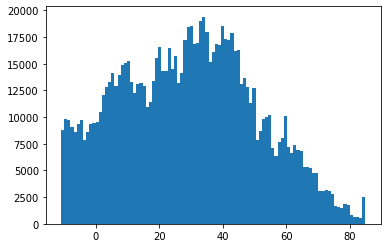

In [47]:
plt.hist(df_without_unknown['age'],bins=len(list(set(df_final.age)))-1)

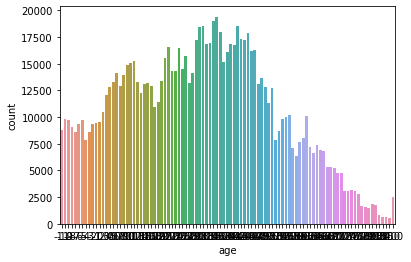

In [48]:
sns.countplot(df_without_unknown['age'])

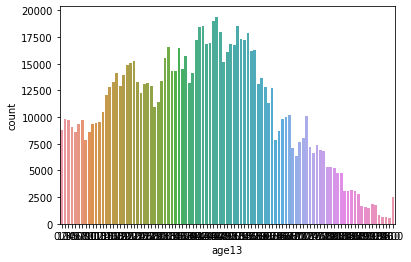

In [49]:
sns.countplot(df_without_unknown['age13'])

- 도수분포표

In [50]:
pd.Series(df_without_unknown['age']).value_counts()

34.0    19401
33.0    18995
40.0    18529
30.0    18491
29.0    18417
        ...  
78.0     1487
81.0      803
82.0      680
83.0      641
84.0      571
Name: age, Length: 97, dtype: int64

In [51]:
pd.Series(df_without_unknown['age13']).value_counts()

45.0    19401
44.0    18995
51.0    18529
41.0    18491
40.0    18417
        ...  
89.0     1487
92.0      803
93.0      680
94.0      641
95.0      571
Name: age13, Length: 97, dtype: int64

> 보너스 심화문제

- 다음은 dictionary 형태로 함수에 호출할 수 있을 때의 함수이다.
- 역공학을 통해 넘겨받는 dictionary 형태를 추측하라.

In [52]:
## 보너스  // dictionary 형태로 넘겨줬을 때 일괄처리 함수
def get_birth_list_from_dict(person):
    temp_pid_age = {}
    for i in list(person.keys()):
        age = how_old_are_you(person[i])
        temp_pid_age[i] = age
        # print(f'person_{i}\'s age : {age}') # 개인별 코드
    return temp_pid_age